KNN simulation with IRIS data. Here all features are numerical(sepal-width,sepal-length,peta-width,petal-length). 
Algorithm:  <br />
Step1: load data <br />
Step2: train-test split <br />
Step3: standardize features <br />
Step4: fit KNN for a range of K values with eucledian distance metric <br />
step5: for each K, perform 10 fold cv and compute accuracy for each fold and record the average accuracy score <br />
Step6: pick optimal K with maximum average accuracy. <br />
Step7: fit model again with optimal K <br />
Step8: use test set to compute final test set accuracy(validation/final model evaliation) <br />
Step9: visualize the accuracy(mean accuracy) for each K

The optimal number of neighbors is: 11
Accuracy of the k-NN classifier with k=11: 1.0


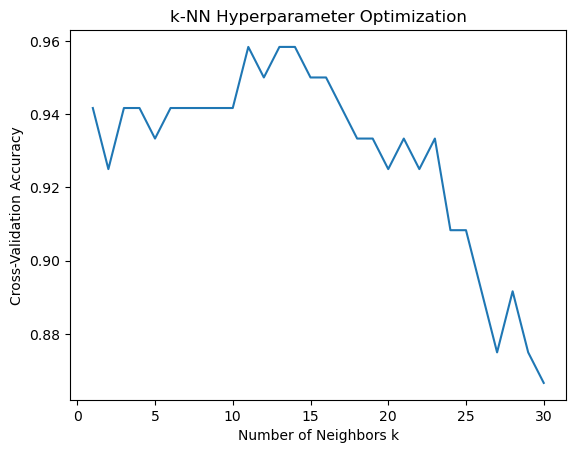

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter optimization for k
k_range = range(1, 31)
cv_scores = []

# Perform cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k
optimal_k = k_range[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is: {optimal_k}")

# Train the k-NN classifier with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn_optimal.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the k-NN classifier with k={optimal_k}: {accuracy}")

# Plotting the cross-validation accuracy scores
import matplotlib.pyplot as plt

plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Hyperparameter Optimization')
plt.show()


KNN simulation with newsgroups data. Here the goal is to find perform a classification based on text similarities. <br />
Build stepwise algorithm:


The optimal number of neighbors is: 12
Accuracy of the k-NN classifier with k=12: 0.5702917771883289


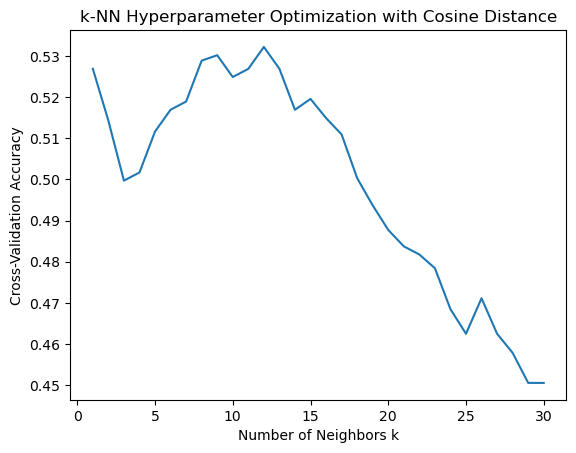

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
X, y = newsgroups.data, newsgroups.target

#Use only a small part of the dataset (10%) to be able to run the code in our computers
sample_size = int(0.1 * len(X))
np.random.seed(42)
indices = np.random.choice(len(X), sample_size, replace=False)
X_sampled = [X[i] for i in indices]
y_sampled = [y[i] for i in indices]
X = X_sampled
y = y_sampled
# Convert the text data to TF-IDF(Term frequency Inverse document frequency) features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Hyperparameter optimization for k
k_range = range(1, 31)
cv_scores = []

# Perform cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k
optimal_k = k_range[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is: {optimal_k}")

# Train the k-NN classifier with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, metric='cosine')
knn_optimal.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn_optimal.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the k-NN classifier with k={optimal_k}: {accuracy}")

# Plotting the cross-validation accuracy scores
import matplotlib.pyplot as plt

plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('k-NN Hyperparameter Optimization with Cosine Distance')
plt.show()
